<a href="https://colab.research.google.com/github/star-nox/FHR-Classification/blob/main/fetal_cardiotocography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
from sklearn import metrics


In [ ]:
# !pip uninstall xlrd
# !pip install xlrd
import matplotlib
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
matplotlib.__version__ 

Found existing installation: xlrd 1.1.0
Uninstalling xlrd-1.1.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.8/dist-packages/xlrd-1.1.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/xlrd/*
Proceed (y/n)? y
  Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.7 MB/s 


'3.2.2'

In [ ]:
ctg_data = pd.read_excel('CTG.xls', sheet_name='Raw Data', skiprows=[1], nrows=2126)

In [ ]:
ctg_data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


# Exploratory Data Analysis

In [ ]:
ctg_data.dtypes

FileName            object
Date        datetime64[ns]
SegFile             object
b                    int64
e                    int64
LBE                  int64
LB                   int64
AC                   int64
FM                   int64
UC                   int64
ASTV                 int64
MSTV               float64
ALTV                 int64
MLTV               float64
DL                   int64
DS                   int64
DP                   int64
DR                   int64
Width                int64
Min                  int64
Max                  int64
Nmax                 int64
Nzeros               int64
Mode                 int64
Mean                 int64
Median               int64
Variance             int64
Tendency             int64
A                    int64
B                    int64
C                    int64
D                    int64
E                    int64
AD                   int64
DE                   int64
LD                   int64
FS                   int64
S

All the columns are numeric.

In [ ]:
ctg_data.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

No NULL values present in the data wowow.

In [ ]:
from locale import normalize

ctg_data['NSP'].value_counts(normalize = True)*100

1    77.845720
2    13.875823
3     8.278457
Name: NSP, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


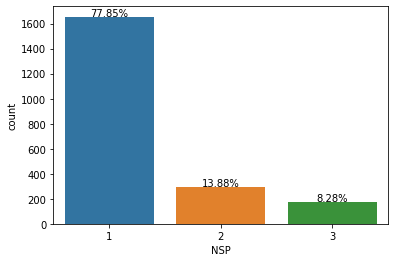

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot('NSP',data = ctg_data)
per = [77.845720,13.875823,8.278457]
p = ax.patches
for i in range(len(p)):
   x = p[i].get_x() + p[i].get_width()/2
   y = p[i].get_height()+2
   ax.annotate('{:.2f}%'.format(per[i]), (x, y), ha='center')
plt.show()

In [ ]:
ctg_data = ctg_data.drop(columns = ['FileName', 'Date', 'SegFile'])


In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X, y = ctg_data.loc[:, ~ctg_data.columns.isin(['NSP'])], ctg_data['NSP']
X1, y1 = ctg_data.loc[:, ~ctg_data.columns.isin(['NSP'])], ctg_data['NSP']



# transform the dataset
oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X, y)

In [ ]:
X

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,240,357,120,120,0,0,0,73,0.5,43,...,0,0,0,0,0,0,0,1,0,9
1,5,632,132,132,4,0,4,17,2.1,0,...,0,0,0,0,1,0,0,0,0,6
2,177,779,133,133,2,0,5,16,2.1,0,...,0,0,0,0,1,0,0,0,0,6
3,411,1192,134,134,2,0,6,16,2.4,0,...,0,0,0,0,1,0,0,0,0,6
4,533,1147,132,132,4,0,5,16,2.4,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059,2867,140,140,0,0,6,79,0.2,25,...,0,0,0,1,0,0,0,0,0,5
2122,1576,2867,140,140,1,0,9,78,0.4,22,...,0,0,0,1,0,0,0,0,0,5
2123,1576,2596,140,140,1,0,7,79,0.4,20,...,0,0,0,1,0,0,0,0,0,5
2124,1576,3049,140,140,1,0,9,78,0.4,27,...,0,0,0,1,0,0,0,0,0,5


In [ ]:
y_SMOTE.value_counts()

2    1655
1    1655
3    1655
Name: NSP, dtype: int64

## Splitting data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train_SMOTE, x_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.30, random_state = 42)

In [ ]:
x_train_SMOTE.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
4078,0,1207,126,126,0,1,1,76,0.778902,67,...,0,0,0,0,0,0,0,0,0,8
1650,247,1197,132,132,8,0,8,55,2.700000,0,...,0,0,0,0,1,0,0,0,0,6
4231,1416,2120,135,135,2,0,1,60,1.510154,5,...,0,0,0,0,0,0,0,0,0,8
112,5,612,129,129,3,2,3,35,1.300000,0,...,1,0,0,0,0,0,0,0,0,2
4962,90,982,123,123,0,0,0,71,0.300000,80,...,0,0,0,0,0,0,0,1,0,9


## Logistic Regression with Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
LR_SMOTE = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR_SMOTE.fit(x_train_SMOTE, y_train_SMOTE)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LR_SMOTE, x_train_SMOTE, y_train_SMOTE, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Training Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Training Accuracy: 0.841 (0.023)


In [ ]:
y_pred_SMOTE = LR_SMOTE.predict(x_test_SMOTE)

In [ ]:
from sklearn.metrics import accuracy_score

LR_SMOTE_accuracy = accuracy_score(y_test_SMOTE, y_pred_SMOTE)
print("Test Accuracy of Logistic Regression with SMOTE: ", round(LR_SMOTE_accuracy,3))
LR_SMOTE_metrics = metrics.classification_report(y_test_SMOTE, y_pred_SMOTE, output_dict = True)['macro avg']
print(LR_SMOTE_metrics)

Test Accuracy of Logistic Regression with SMOTE:  0.866
{'precision': 0.8663917892140641, 'recall': 0.866329632566746, 'f1-score': 0.8663432038231506, 'support': 1490}


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_SMOTE, y_pred_SMOTE))

              precision    recall  f1-score   support

           1       0.88      0.87      0.88       520
           2       0.82      0.83      0.82       485
           3       0.90      0.90      0.90       485

    accuracy                           0.87      1490
   macro avg       0.87      0.87      0.87      1490
weighted avg       0.87      0.87      0.87      1490



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

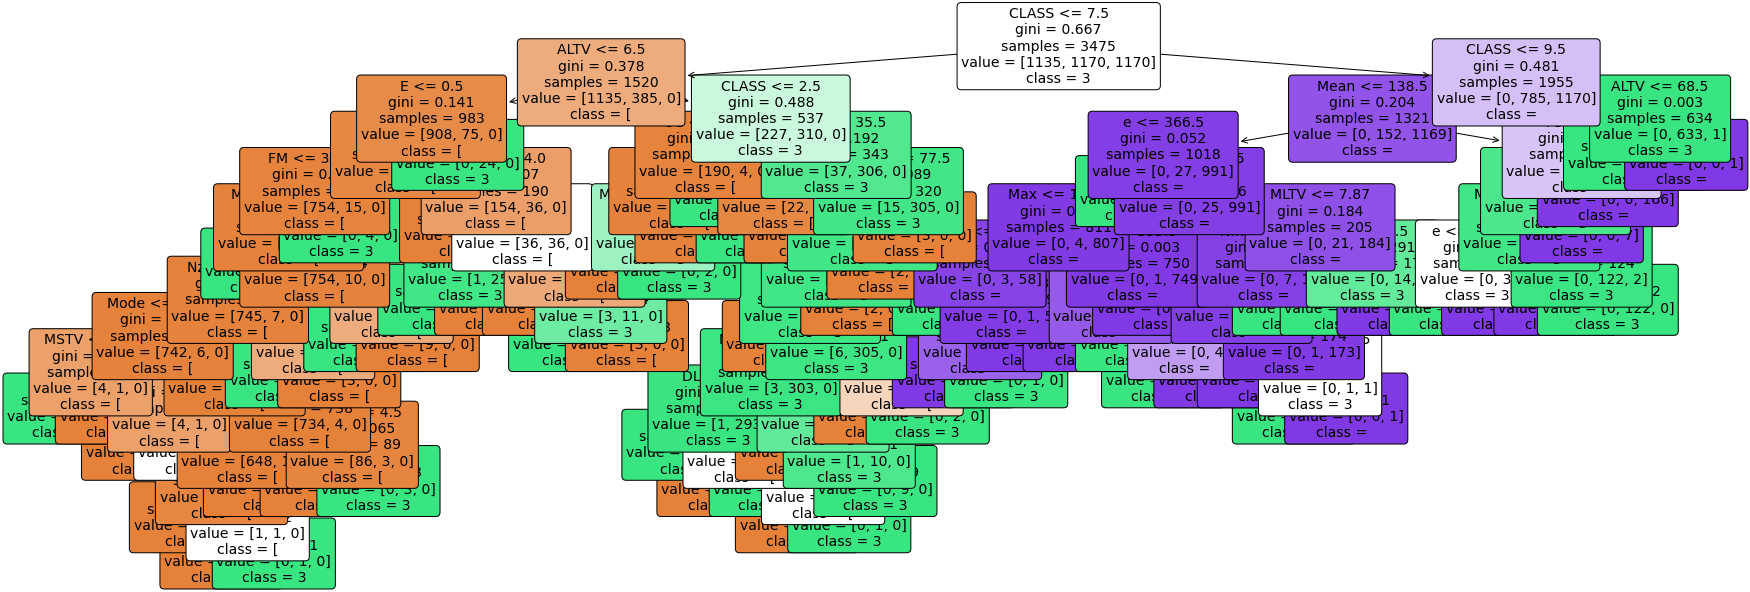

In [ ]:
from sklearn import tree

plt.figure(figsize=(30,10))

diagram = tree.plot_tree(dtc_model, feature_names = x_train_SMOTE.columns, class_names = str(y_train_SMOTE.unique()), rounded=True, filled=True, fontsize=14)

plt.show()

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(dtc_model, feature_names=list(x_train_SMOTE.columns))

print(tree_rules)

|--- CLASS <= 7.50
|   |--- ALTV <= 6.50
|   |   |--- E <= 0.50
|   |   |   |--- ALTV <= 0.50
|   |   |   |   |--- FM <= 324.50
|   |   |   |   |   |--- Median <= 98.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Median >  98.00
|   |   |   |   |   |   |--- FM <= 159.00
|   |   |   |   |   |   |   |--- Nzeros <= 3.50
|   |   |   |   |   |   |   |   |--- Mode <= 102.50
|   |   |   |   |   |   |   |   |   |--- MSTV <= 1.30
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- MSTV >  1.30
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Mode >  102.50
|   |   |   |   |   |   |   |   |   |--- Median <= 108.50
|   |   |   |   |   |   |   |   |   |   |--- DP <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- DP >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Median >  108.5

In [ ]:
y_pred_dtc_SMOTE = dtc_model.predict(x_test_SMOTE)

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

dtc_conf_matrix = metrics.confusion_matrix(y_test_SMOTE, y_pred_dtc_SMOTE)

dtc_mat_df = pd.DataFrame(dtc_conf_matrix)

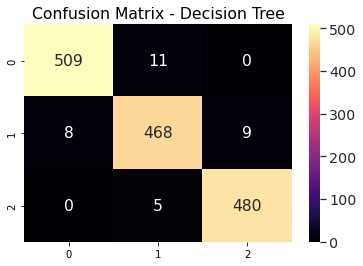

<Figure size 720x504 with 0 Axes>

In [ ]:
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))

sns.heatmap(dtc_mat_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
DTC_accuracy_SMOTE = accuracy_score(y_test_SMOTE, y_pred_dtc_SMOTE)
print("Test Accuracy of Decision Tree with SMOTE: ", round(DTC_accuracy_SMOTE,3))
DT_SMOTE_metrics = metrics.classification_report(y_test_SMOTE, y_pred_dtc_SMOTE, output_dict = True)['macro avg']
print(DT_SMOTE_metrics)

Test Accuracy of Decision Tree with SMOTE:  0.978
{'precision': 0.977687784323519, 'recall': 0.9778284430346286, 'f1-score': 0.9777494909606146, 'support': 1490}


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_rf_SMOTE = rf.predict(x_test_SMOTE)

In [ ]:
rf_SMOTE_accuracy = accuracy_score(y_test_SMOTE, y_pred_rf_SMOTE)
print("Test Accuracy of Random Forest: ", round(rf_SMOTE_accuracy,3))
RF_SMOTE_metrics = metrics.classification_report(y_test_SMOTE, y_pred_rf_SMOTE, output_dict = True)['macro avg']
print(RF_SMOTE_metrics)

Test Accuracy of Random Forest:  0.993
{'precision': 0.9926691581381757, 'recall': 0.9925786412899815, 'f1-score': 0.9926191568880981, 'support': 1490}


In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=x_train_SMOTE.columns).sort_values(ascending=False)
feature_imp

CLASS       0.227920
FS          0.075821
ALTV        0.069519
SUSP        0.066669
Mean        0.063921
Median      0.051190
LD          0.049566
ASTV        0.047278
MSTV        0.042282
AC          0.037247
Mode        0.035969
LB          0.025544
MLTV        0.024391
LBE         0.019711
A           0.019558
Variance    0.017075
B           0.016763
DL          0.014944
Max         0.012216
UC          0.011695
e           0.009210
Width       0.008371
DP          0.007907
Min         0.007830
b           0.006865
DE          0.006270
AD          0.005551
E           0.005315
FM          0.005071
Nmax        0.004510
Tendency    0.002212
Nzeros      0.001259
D           0.000222
C           0.000129
DR          0.000000
DS          0.000000
dtype: float64

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_svm_linear_SMOTE = svm_model.predict(x_test_SMOTE)

accuracy_svm_linear_SMOTE = accuracy_score(y_pred_svm_linear_SMOTE, y_test_SMOTE)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_svm_linear_SMOTE,3))
svm_linear_metrics_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_svm_linear_SMOTE, output_dict = True)['macro avg']
print(svm_linear_metrics_SMOTE)

Test accuracy of SVM model with linear kernel:  0.988
{'precision': 0.987903237480909, 'recall': 0.9878139043087497, 'f1-score': 0.9878391064952513, 'support': 1490}


In [ ]:
svm_model_rbf = svm.SVC(kernel = 'rbf')
svm_model_rbf.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_svm_rbf_SMOTE = svm_model_rbf.predict(x_test_SMOTE)

accuracy_svm_rbf_SMOTE = accuracy_score(y_pred_svm_rbf_SMOTE, y_test_SMOTE)
print("Test accuracy of SVM model with radial kernel: ", round(accuracy_svm_rbf_SMOTE,3))
svm_rbf_metrics_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_svm_rbf_SMOTE, output_dict = True)['macro avg']
print(svm_rbf_metrics_SMOTE)

Test accuracy of SVM model with radial kernel:  0.685
{'precision': 0.7411930089311646, 'recall': 0.6865450700502246, 'f1-score': 0.6923489776361956, 'support': 1490}


In [ ]:
svm_model_poly = svm.SVC(kernel = 'poly')
svm_model_poly.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_svm_poly_SMOTE = svm_model_poly.predict(x_test_SMOTE)

accuracy_svm_poly_SMOTE = accuracy_score(y_pred_svm_poly_SMOTE, y_test_SMOTE)
print("Test accuracy of SVM model with polynomial kernel: ", round(accuracy_svm_poly_SMOTE,3))
svm_rbf_poly_SMOTE = metrics.classification_report(y_test_SMOTE, y_pred_svm_poly_SMOTE, output_dict = True)['macro avg']
print(svm_rbf_poly_SMOTE)

Test accuracy of SVM model with polynomial kernel:  0.552
{'precision': 0.7359284919379805, 'recall': 0.55736188210415, 'f1-score': 0.5386161570759415, 'support': 1490}


In [ ]:
type(svm_rbf_poly_SMOTE)

dict

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# build model on the training data
nb_model = GaussianNB()
nb_model.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_nb_SMOTE = nb_model.predict(x_test_SMOTE)
accuracy_nb_SMOTE = accuracy_score(y_pred_nb_SMOTE, y_test_SMOTE)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_nb_SMOTE,3))
nb_metrics_SMOTE = classification_report(y_test_SMOTE, y_pred_nb_SMOTE, output_dict= True)['macro avg']
print(nb_metrics_SMOTE)

Test accuracy of SVM model with linear kernel:  0.975
{'precision': 0.9758531266060283, 'recall': 0.9746629659000793, 'f1-score': 0.9750655076128294, 'support': 1490}


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# build model on the training data
xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_xgb_SMOTE = xgb.predict(x_test_SMOTE)
accuracy_xgb_SMOTE = accuracy_score(y_pred_xgb_SMOTE, y_test_SMOTE)
print("Test accuracy of XGB model: ", round(accuracy_xgb_SMOTE,3))
xgb_metrics_SMOTE = classification_report(y_test_SMOTE, y_pred_xgb_SMOTE, output_dict= True)['macro avg']
print(xgb_metrics_SMOTE)


Test accuracy of XGB model:  0.99
{'precision': 0.9900132112789085, 'recall': 0.9899682791435369, 'f1-score': 0.9899900919512749, 'support': 1490}


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# build model on the training data
knn = KNeighborsClassifier()
knn.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_knn_SMOTE = knn.predict(x_test_SMOTE)
accuracy_knn_SMOTE = accuracy_score(y_pred_knn_SMOTE, y_test_SMOTE)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_knn_SMOTE,3))
knn_metrics_SMOTE = classification_report(y_test_SMOTE, y_pred_knn_SMOTE, output_dict= True)['macro avg']
print(knn_metrics_SMOTE)

Test accuracy of SVM model with linear kernel:  0.856
{'precision': 0.8634393752162358, 'recall': 0.8598136399682792, 'f1-score': 0.855349077815871, 'support': 1490}


## Artificial neural network on SMOTE applied data

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SMOTE_sd = sc.fit_transform(x_train_SMOTE)
X_test_SMOTE_sd = sc.transform(x_test_SMOTE)

In [ ]:
y_train_SMOTE_1= y_train_SMOTE.replace(1,0)
y_train_SMOTE_1= y_train_SMOTE_1.replace(2,1)
y_train_SMOTE_1= y_train_SMOTE_1.replace(3,2)

In [ ]:
y_test_SMOTE_1= y_test_SMOTE.replace(1,0)
y_test_SMOTE_1= y_test_SMOTE_1.replace(2,1)
y_test_SMOTE_1= y_test_SMOTE_1.replace(3,2)

In [ ]:
y_train_SMOTE_1 = keras.utils.to_categorical(y_train_SMOTE_1,3)
y_test_SMOTE_1 = keras.utils.to_categorical(y_test_SMOTE_1,3)

In [ ]:
from tensorflow import keras
classes = 3
model = keras.models.Sequential()

model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(36,), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(classes,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss="categorical_crossentropy",metrics=['accuracy'])

ep = model.fit(X_train_SMOTE_sd,y_train_SMOTE_1,batch_size=32,epochs = 5)


Epoch 1/5
109/109 [==============================] - 1s 2ms/step - loss: 0.1326 - accuracy: 0.9652
Epoch 2/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 3/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9931
Epoch 4/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9951
Epoch 5/5
109/109 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9942


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               4736      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 21,635
Trainable params: 21,635
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test_SMOTE_sd,y_test_SMOTE_1)


Evaluation against Test Dataset :
------------------------------------
47/47 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9926


[0.029163634404540062, 0.9926174283027649]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


y_pred_SMOTE = model.predict(X_test_SMOTE_sd, verbose=0)
y_pred_ann = (model.predict(X_test_SMOTE_sd) > 0.5).astype("int32")
accuracy_ann_SMOTE = accuracy_score(y_pred_ann, y_test_SMOTE_1)
print("Test accuracy of ANN: ", round(accuracy_ann_SMOTE,3))
ann_metrics_SMOTE = classification_report(y_test_SMOTE_1, y_pred_ann, output_dict= True)['macro avg']
print(ann_metrics_SMOTE)

# # precision tp / (tp + fp)
# precision = precision_score(y_test_SMOTE_1, y_pred_class, average = 'macro')
# print('Precision: %f', precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_SMOTE_1, y_pred_class, average = 'macro')
# print('Recall: %f', recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_SMOTE_1, y_pred_class, average = 'macro')
# print('F1 score: %f', f1)

47/47 [==============================] - 0s 2ms/step
Test accuracy of ANN:  0.993
{'precision': 0.9925825296195666, 'recall': 0.9926711604546656, 'f1-score': 0.9926249150873071, 'support': 1490}


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


y_pred_SMOTE = model.predict(X_test_SMOTE_sd, verbose=0)
y_pred_class = (model.predict(X_test_SMOTE_sd) > 0.5).astype("int32")

# precision tp / (tp + fp)
precision = precision_score(y_test_SMOTE_1, y_pred_class, average = None)
print('Precision: %f', precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_SMOTE_1, y_pred_class, average = None)
print('Recall: %f', recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_SMOTE_1, y_pred_class, average = None)
print('F1 score: %f', f1)

47/47 [==============================] - 0s 837us/step
Precision: %f [0.996139   0.98568507 0.99792961]
Recall: %f [0.99230769 0.99381443 0.99381443]
F1 score: %f [0.99421965 0.98973306 0.99586777]


## PCA

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
x_train_pca = pca.fit_transform(X_train_SMOTE_sd)
x_test_pca = pca.transform(X_test_SMOTE_sd)

In [ ]:
x_train_pca

array([[ 4.15139953, -1.84080654,  0.70379995, ...,  0.38959464,
        -0.128423  , -1.46564422],
       [ 3.32395991,  1.71763834, -1.04689456, ..., -0.50071355,
         0.18520573, -0.91763141],
       [-1.61978445, -2.96476875,  1.58326917, ...,  0.34951898,
        -0.68834964, -0.91337162],
       ...,
       [-2.0639606 , -0.19847219, -1.58576358, ...,  0.36001468,
         0.06258324, -0.359946  ],
       [-3.99795409, -1.05512005, -0.6701199 , ..., -0.02315044,
        -0.66153118, -0.26159125],
       [-2.06065354,  2.49890709,  1.87656072, ..., -0.32987033,
        -0.28307426,  0.01139258]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# build model on the training data
nb_model = GaussianNB()
nb_model.fit(x_train_pca, y_train_SMOTE)
y_pred_nb_pca = nb_model.predict(x_test_pca)
accuracy_nb_SMOTE = accuracy_score(y_pred_nb_pca, y_test_SMOTE)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_nb_SMOTE,3))
nb_metrics_SMOTE = classification_report(y_test_SMOTE, y_pred_nb_pca, output_dict= True)['macro avg']
print(nb_metrics_SMOTE)

Test accuracy of SVM model with linear kernel:  0.943
{'precision': 0.9450500676140936, 'recall': 0.9417195347607717, 'f1-score': 0.9424603345455571, 'support': 1490}


## Accuracy table

In [ ]:
# creating a dataframe of all accuracies

cols = ['Model', 'Test Accuracy']

accuracy_data = [['Logistic Regression', round(LR_SMOTE_accuracy,3)], ['Decision Tree', round(DTC_accuracy_SMOTE,3)], 
                 ['Random Forest', round(rf_SMOTE_accuracy,3)], ['SVM with Linear Kernel', round(accuracy_svm_linear_SMOTE,3)],
                 ['SVM with Radial Kernel', round(accuracy_svm_rbf_SMOTE,3)], ['SVM with Polynomial Kernel', round(
                     accuracy_svm_poly_SMOTE,3)], ['Gaussian NB', round(accuracy_nb_SMOTE,3)], ['XG Boost', round(accuracy_xgb_SMOTE, 3)],['KNN', round(accuracy_knn_SMOTE,3)]]

accuracy_df = pd.DataFrame(accuracy_data, columns=cols)

accuracy_df

,Model,Test Accuracy
0,Logistic Regression,0.866
1,Decision Tree,0.978
2,Random Forest,0.993
3,SVM with Linear Kernel,0.988
4,SVM with Radial Kernel,0.685
5,SVM with Polynomial Kernel,0.552
6,Gaussian NB,0.975
7,XG Boost,0.990
8,KNN,0.856


## Result table

In [ ]:
metrics_SMOTE = pd.DataFrame()
LR = pd.DataFrame(LR_SMOTE_metrics.items()).transpose().drop(0)
DT = pd.DataFrame(DT_SMOTE_metrics.items()).transpose().drop(0)
RF = pd.DataFrame(RF_SMOTE_metrics.items()).transpose().drop(0)
svm_linear = pd.DataFrame(svm_linear_metrics_SMOTE.items()).transpose().drop(0)
svm_rbf = pd.DataFrame(svm_rbf_metrics_SMOTE.items()).transpose().drop(0)
svm_rbf_poly = pd.DataFrame(svm_rbf_poly_SMOTE.items()).transpose().drop(0)
NB = pd.DataFrame(nb_metrics_SMOTE.items()).transpose().drop(0)
xgb_model = pd.DataFrame(xgb_metrics_SMOTE.items()).transpose().drop(0)
knn_model = pd.DataFrame(knn_metrics_SMOTE.items()).transpose().drop(0)
ann_model = pd.DataFrame(ann_metrics_SMOTE.items()).transpose().drop(0)
metrics_SMOTE = LR.append(DT)
metrics_SMOTE = metrics_SMOTE.append(RF)
metrics_SMOTE = metrics_SMOTE.append(svm_linear)
metrics_SMOTE = metrics_SMOTE.append(svm_rbf)
metrics_SMOTE = metrics_SMOTE.append(svm_rbf_poly)
metrics_SMOTE = metrics_SMOTE.append(NB)
metrics_SMOTE = metrics_SMOTE.append(xgb_model)
metrics_SMOTE = metrics_SMOTE.append(knn_model)
metrics_SMOTE = metrics_SMOTE.append(ann_model)
metrics_SMOTE.columns = ["Precision","Recall","F1-Score","Support"]
metrics_SMOTE['Model'] = ["Logistic Regression","Decision Trees","Random Forest","SVM with Linear Kernel","SVM with RBF Kernel","SVM with Polynomial Kernel", "Gaussian NB", 
                          'XG Boost','KNN','ANN']
metrics_SMOTE['Accuracy'] = [round(LR_SMOTE_accuracy,3),round(DTC_accuracy_SMOTE,3),round(rf_SMOTE_accuracy,3),round(accuracy_svm_linear_SMOTE,3),round(
    accuracy_svm_rbf_SMOTE,3),round(accuracy_svm_poly_SMOTE,3), round(accuracy_nb_SMOTE,3), round(accuracy_xgb_SMOTE,3), round(accuracy_knn_SMOTE,3),round(accuracy_ann_SMOTE,3)]
metrics_SMOTE = metrics_SMOTE.set_index('Model')
metrics_SMOTE 

,Precision,Recall,F1-Score,Support,Accuracy
Model,,,,,
Logistic Regression,0.866392,0.86633,0.866343,1490.0,0.866
Decision Trees,0.977688,0.977828,0.977749,1490.0,0.978
Random Forest,0.992669,0.992579,0.992619,1490.0,0.993
SVM with Linear Kernel,0.987903,0.987814,0.987839,1490.0,0.988
SVM with RBF Kernel,0.741193,0.686545,0.692349,1490.0,0.685
SVM with Polynomial Kernel,0.735928,0.557362,0.538616,1490.0,0.552
Gaussian NB,0.975853,0.974663,0.975066,1490.0,0.975
XG Boost,0.990013,0.989968,0.98999,1490.0,0.990
KNN,0.863439,0.859814,0.855349,1490.0,0.856


# Models without SMOTE

In [ ]:
y1.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 42)

## Logistic Regression with Cross Validation

In [ ]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LR, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Training Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Training Accuracy: 0.883 (0.023)


In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred)
print("Test Accuracy of Logistic Regression: ", round(accuracy1,3))
LR_metrics = metrics.classification_report(y_test, y_pred, output_dict = True)['macro avg']
print(LR_metrics)

Test Accuracy of Logistic Regression:  0.876
{'precision': 0.7666749688667497, 'recall': 0.7641416285609678, 'f1-score': 0.759070627106734, 'support': 638}


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

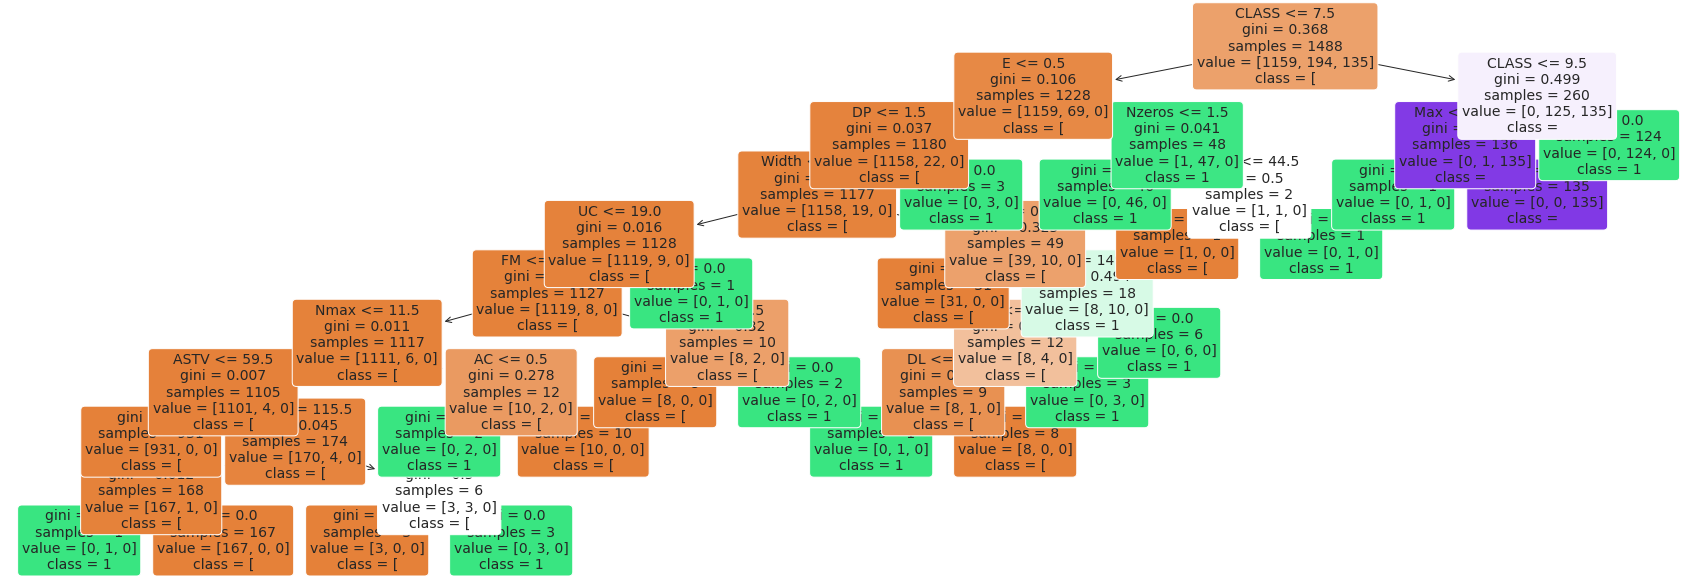

In [ ]:
from sklearn import tree

plt.figure(figsize=(30,10))

diagram = tree.plot_tree(dtc_model, feature_names = x_train.columns, class_names = str(y_train.unique()), rounded=True, filled=True, fontsize=14)

plt.show()

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(dtc_model, feature_names=list(x_train.columns))

print(tree_rules)

|--- CLASS <= 7.50
|   |--- E <= 0.50
|   |   |--- DP <= 1.50
|   |   |   |--- Width <= 140.50
|   |   |   |   |--- UC <= 19.00
|   |   |   |   |   |--- FM <= 209.00
|   |   |   |   |   |   |--- Nmax <= 11.50
|   |   |   |   |   |   |   |--- ASTV <= 59.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ASTV >  59.50
|   |   |   |   |   |   |   |   |--- Width <= 115.50
|   |   |   |   |   |   |   |   |   |--- e <= 433.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- e >  433.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Width >  115.50
|   |   |   |   |   |   |   |   |   |--- ALTV <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- ALTV >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Nmax >  11.50
|   |   |   |   |   |   |   |--- AC <= 0.50
|   |   |   |   |   |   |   

In [ ]:
y_pred_dtc = dtc_model.predict(x_test)

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

dtc_conf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)

dtc_mat_df = pd.DataFrame(dtc_conf_matrix)

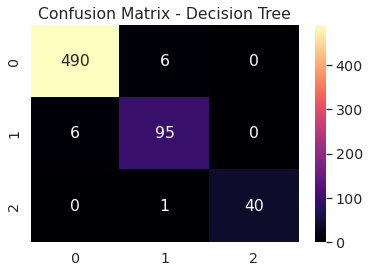

<Figure size 720x504 with 0 Axes>

In [ ]:
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))

sns.heatmap(dtc_mat_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
accuracy2 = accuracy_score(y_test, y_pred_dtc)
print("Test Accuracy of Decision Tree: ", round(accuracy2,3))
DT_metrics = metrics.classification_report(y_test, y_pred_dtc, output_dict = True)['macro avg']
print(DT_metrics)

Test Accuracy of Decision Tree:  0.98
{'precision': 0.9730919249420199, 'recall': 0.968035680436651, 'f1-score': 0.9705060459757036, 'support': 638}


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy of Random Forest: ", round(accuracy3,3))
RF_metrics = metrics.classification_report(y_test, y_pred_rf, output_dict = True)['macro avg']
print(RF_metrics)

Test Accuracy of Random Forest:  0.991
{'precision': 0.9880869374663824, 'recall': 0.9806248425786718, 'f1-score': 0.984305367987845, 'support': 638}


In [ ]:
feature_imp = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

CLASS       0.241590
SUSP        0.118361
E           0.073314
LD          0.068766
ASTV        0.054541
MSTV        0.054408
FS          0.051953
Mean        0.040875
ALTV        0.031445
Mode        0.029412
AC          0.028934
DP          0.022452
Median      0.020042
A           0.017773
Width       0.014341
Variance    0.013920
Min         0.013803
LB          0.013202
MLTV        0.012369
LBE         0.010619
UC          0.010463
Max         0.008379
DE          0.007615
e           0.007269
Nmax        0.006905
b           0.006186
B           0.006027
FM          0.004921
DL          0.004284
AD          0.002078
Nzeros      0.001449
Tendency    0.001409
C           0.000788
D           0.000081
DS          0.000025
DR          0.000000
dtype: float64

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(x_train, y_train)

y_pred_svm_linear = svm_model.predict(x_test)

accuracy_svm_linear = accuracy_score(y_pred_svm_linear, y_test)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_svm_linear,3))
svm_linear_metrics = metrics.classification_report(y_test, y_pred_svm_linear, output_dict = True)['macro avg']
print(svm_linear_metrics)

Test accuracy of SVM model with linear kernel:  0.98
{'precision': 0.9703494935643041, 'recall': 0.9654073934144005, 'f1-score': 0.9678457738299717, 'support': 638}


In [ ]:
svm_model_rbf = svm.SVC(kernel = 'rbf')
svm_model_rbf.fit(x_train, y_train)

y_pred_svm_rbf = svm_model_rbf.predict(x_test)

accuracy_svm_rbf = accuracy_score(y_pred_svm_rbf, y_test)
print("Test accuracy of SVM model with radial kernel: ", round(accuracy_svm_rbf,3))
svm_rbf_metrics = metrics.classification_report(y_test, y_pred_svm_rbf, output_dict = True)['macro avg']
print(svm_rbf_metrics)

Test accuracy of SVM model with radial kernel:  0.777
{'precision': 0.25914315569487983, 'recall': 0.3333333333333333, 'f1-score': 0.29159318048206934, 'support': 638}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_model_poly = svm.SVC(kernel = 'poly')
svm_model_poly.fit(x_train, y_train)

y_pred_svm_poly = svm_model_poly.predict(x_test)

accuracy_svm_poly = accuracy_score(y_pred_svm_poly, y_test)
print("Test accuracy of SVM model with polynomial kernel: ", round(accuracy_svm_poly,3))
svm_rbf_poly_metrics = metrics.classification_report(y_test, y_pred_svm_poly, output_dict = True)['macro avg']
print(svm_rbf_poly_metrics)

Test accuracy of SVM model with polynomial kernel:  0.777


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'precision': 0.25914315569487983, 'recall': 0.3333333333333333, 'f1-score': 0.29159318048206934, 'support': 638}


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# build model on the training data
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
accuracy_nb = accuracy_score(y_pred_nb, y_test)
print("Test accuracy of SVM model with linear kernel: ", round(accuracy_nb,3))
nb_metrics= classification_report(y_test, y_pred_nb, output_dict= True)['macro avg']
print(nb_metrics)

Test accuracy of SVM model with linear kernel:  0.986
{'precision': 0.9833199464524766, 'recall': 0.9733521395019125, 'f1-score': 0.9782766372820796, 'support': 638}


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# build model on the training data
xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_pred_xgb, y_test)
print("Test accuracy of XGB model: ", round(accuracy_xgb,3))
xgb_metrics = classification_report(y_test, y_pred_xgb, output_dict= True)['macro avg']
print(xgb_metrics)


Test accuracy of XGB model:  0.987
{'precision': 0.9841159166218433, 'recall': 0.9766524695349158, 'f1-score': 0.980333671724563, 'support': 638}


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# build model on the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("Test accuracy of KNN: ", round(accuracy_knn,3))
knn_metrics = classification_report(y_test, y_pred_knn, output_dict= True)['macro avg']
print(knn_metrics)

Test accuracy of KNN:  0.817
{'precision': 0.696353867488265, 'recall': 0.5092467989914649, 'f1-score': 0.5552764614485114, 'support': 638}


## Artificial Neural Networks on original data

In [ ]:
X

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,240,357,120,120,0,0,0,73,0.5,43,...,0,0,0,0,0,0,0,1,0,9
1,5,632,132,132,4,0,4,17,2.1,0,...,0,0,0,0,1,0,0,0,0,6
2,177,779,133,133,2,0,5,16,2.1,0,...,0,0,0,0,1,0,0,0,0,6
3,411,1192,134,134,2,0,6,16,2.4,0,...,0,0,0,0,1,0,0,0,0,6
4,533,1147,132,132,4,0,5,16,2.4,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059,2867,140,140,0,0,6,79,0.2,25,...,0,0,0,1,0,0,0,0,0,5
2122,1576,2867,140,140,1,0,9,78,0.4,22,...,0,0,0,1,0,0,0,0,0,5
2123,1576,2596,140,140,1,0,7,79,0.4,20,...,0,0,0,1,0,0,0,0,0,5
2124,1576,3049,140,140,1,0,9,78,0.4,27,...,0,0,0,1,0,0,0,0,0,5


In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(x_train)
X_test_sd = sc.transform(x_test)

In [ ]:
y_train.value_counts()

1    1159
2     194
3     135
Name: NSP, dtype: int64

In [ ]:
X_train_sd

array([[ 0.92120438,  1.02578416, -0.20647709, ..., -0.19405387,
        -0.30151134, -0.83026322],
       [-0.74789016, -0.54294576,  0.89941853, ..., -0.19405387,
        -0.30151134, -1.16362308],
       [ 1.36973242,  1.3950212 ,  0.3967387 , ..., -0.19405387,
        -0.30151134,  0.50317625],
       ...,
       [ 0.25115394,  0.26304594, -1.11130078, ..., -0.19405387,
        -0.30151134,  0.50317625],
       [ 0.01647179,  0.19974816, -1.81505254, ..., -0.19405387,
        -0.30151134,  0.50317625],
       [ 0.21715793,  0.06365794,  0.89941853, ..., -0.19405387,
        -0.30151134, -1.16362308]])

In [ ]:
y_test.value_counts()

1    496
2    101
3     41
Name: NSP, dtype: int64

In [ ]:
y_train1 = y_train

In [ ]:
#y_train1= y_train1.replace(1,0)
y_train1= y_train1.replace(2,1)
y_train1= y_train1.replace(3,2)

In [ ]:
y_train1.value_counts()

1    1353
2     135
Name: NSP, dtype: int64

In [ ]:
y_test1= y_test.replace(1,0)
y_test1= y_test1.replace(2,1)
y_test1= y_test1.replace(3,2)

In [ ]:
y_test1.value_counts()

0    496
1    101
2     41
Name: NSP, dtype: int64

In [ ]:

from tensorflow import keras

y_train1 = keras.utils.to_categorical(y_train1,3)
y_test1 = keras.utils.to_categorical(y_test1,3)

classes = 3
model = keras.models.Sequential()

model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(36,), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(classes,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss="categorical_crossentropy",metrics=['accuracy'])

ep = model.fit(X_train_sd,y_train1,batch_size=32,epochs = 5)


Epoch 1/5
47/47 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9819
Epoch 2/5
47/47 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9993
Epoch 3/5
47/47 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
47/47 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9993
Epoch 5/5
47/47 [==============================] - 0s 2ms/step - loss: 8.6348e-04 - accuracy: 0.9993


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               4736      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 21,635
Trainable params: 21,635
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test_sd,y_test1)

y_pred_SMOTE = model.predict(X_test_sd, verbose=0)

y_pred_class=np.argmax(y_pred_SMOTE, axis=1)
y_test=np.argmax(y_test1, axis=1)

NN_metrics = classification_report(y_test, y_pred_class, output_dict= True)['macro avg']
accuracy_nn = accuracy_score(y_test,y_pred_class)


Evaluation against Test Dataset :
------------------------------------
20/20 [==============================] - 0s 2ms/step - loss: 14.7733 - accuracy: 0.2210


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Result table without SMOTE

In [ ]:
LR = pd.DataFrame(LR_metrics.items()).transpose().drop(0)
DT = pd.DataFrame(DT_metrics.items()).transpose().drop(0)
RF = pd.DataFrame(RF_metrics.items()).transpose().drop(0)
svm_linear = pd.DataFrame(svm_linear_metrics.items()).transpose().drop(0)
svm_rbf = pd.DataFrame(svm_rbf_metrics.items()).transpose().drop(0)
svm_rbf_poly = pd.DataFrame(svm_rbf_poly_metrics.items()).transpose().drop(0)
NB = pd.DataFrame(nb_metrics.items()).transpose().drop(0)
xgb_model = pd.DataFrame(xgb_metrics.items()).transpose().drop(0)
knn_model = pd.DataFrame(knn_metrics.items()).transpose().drop(0)
ann_model = pd.DataFrame(NN_metrics.items()).transpose().drop(0)
metrics = LR.append(DT)
metrics = metrics.append(RF)
metrics = metrics.append(svm_linear)
metrics = metrics.append(svm_rbf)
metrics = metrics.append(svm_rbf_poly)
metrics = metrics.append(NB)
metrics = metrics.append(xgb_model)
metrics = metrics.append(knn_model)
metrics = metrics.append(ann_model)

metrics.columns = ["Precision","Recall","F1-Score","Support"]
metrics['Model'] = ["Logistic Regression","Decision Trees","Random Forest","SVM with Linear Kernel","SVM with RBF Kernel","SVM with Polynomial Kernel", "Naive Bayes",
                    'XG Boost','KNN','ANN']
metrics['Accuracy'] = [round(accuracy1,3),round(accuracy2,3),round(accuracy3,3),round(accuracy_svm_linear,3),round(accuracy_svm_rbf,3),round(accuracy_svm_poly,3), round(accuracy_nb,3),
                       round(accuracy_xgb,3), round(accuracy_knn,3), round(accuracy_nn,3)]
metrics = metrics.set_index('Model')
print("Model Metrics without SMOTE")
metrics

Model Metrics without SMOTE


,Precision,Recall,F1-Score,Support,Accuracy
Model,,,,,
Logistic Regression,0.766675,0.764142,0.759071,638.0,0.876
Decision Trees,0.973092,0.968036,0.970506,638.0,0.980
Random Forest,0.988087,0.980625,0.984305,638.0,0.991
SVM with Linear Kernel,0.970349,0.965407,0.967846,638.0,0.980
SVM with RBF Kernel,0.259143,0.333333,0.291593,638.0,0.777
SVM with Polynomial Kernel,0.259143,0.333333,0.291593,638.0,0.777
Naive Bayes,0.98332,0.973352,0.978277,638.0,0.986
XG Boost,0.984116,0.976652,0.980334,638.0,0.987
KNN,0.696354,0.509247,0.555276,638.0,0.817


In [ ]:
print("Model Metrics with SMOTE")
metrics_SMOTE

Model Metrics with SMOTE


,Precision,Recall,F1-Score,Support,Accuracy
Model,,,,,
Logistic Regression,0.866392,0.86633,0.866343,1490.0,0.866
Decision Trees,0.977688,0.977828,0.977749,1490.0,0.978
Random Forest,0.992669,0.992579,0.992619,1490.0,0.993
SVM with Linear Kernel,0.987903,0.987814,0.987839,1490.0,0.988
SVM with RBF Kernel,0.741193,0.686545,0.692349,1490.0,0.685
SVM with Polynomial Kernel,0.735928,0.557362,0.538616,1490.0,0.552
Gaussian NB,0.975853,0.974663,0.975066,1490.0,0.975
XG Boost,0.990013,0.989968,0.98999,1490.0,0.990
KNN,0.863439,0.859814,0.855349,1490.0,0.856


([<matplotlib.axis.XTick at 0x7f03d9dc0250>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Decision Trees'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'SVM with Linear Kernel'),
  Text(0, 0, 'SVM with RBF Kernel'),
  Text(0, 0, 'SVM with Polynomial Kernel'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'XG Boost'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'ANN')])

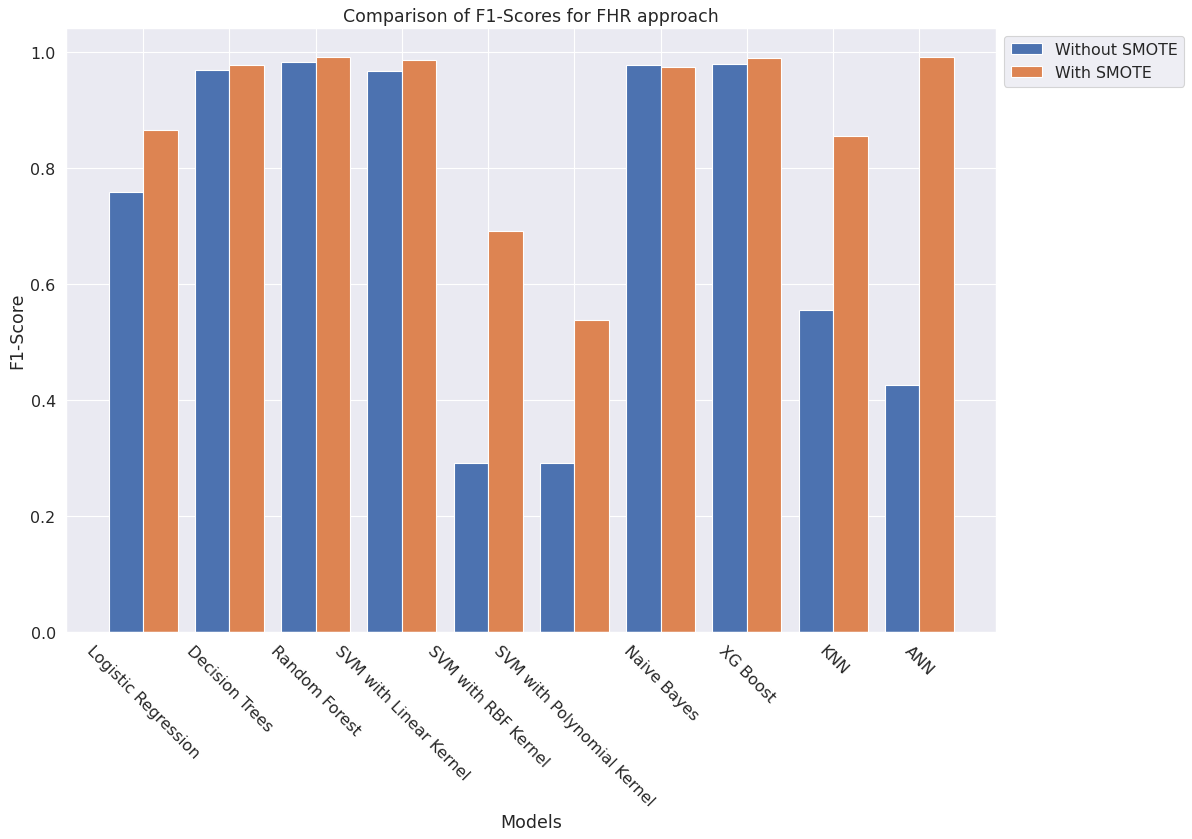

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
# create data
x = np.arange(len(metrics))
y1 = np.array(metrics.loc[:,'F1-Score'])
y2 = np.array(metrics_SMOTE.loc[:,'F1-Score'])
width = 0.40
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Scores for FHR approach')
plt.legend(["Without SMOTE", "With SMOTE"],bbox_to_anchor=(1, 1), loc='upper left')
# plt.legend()
plt.xticks(x, ['Logistic Regression','Decision Trees','Random Forest','SVM with Linear Kernel','SVM with RBF Kernel','SVM with Polynomial Kernel','Naive Bayes','XG Boost','KNN','ANN'],rotation = -45)

([<matplotlib.axis.XTick at 0x7f03d9ccba60>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Decision Trees'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'SVM with Linear Kernel'),
  Text(0, 0, 'SVM with RBF Kernel'),
  Text(0, 0, 'SVM with Polynomial Kernel'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'XG Boost'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'ANN')])

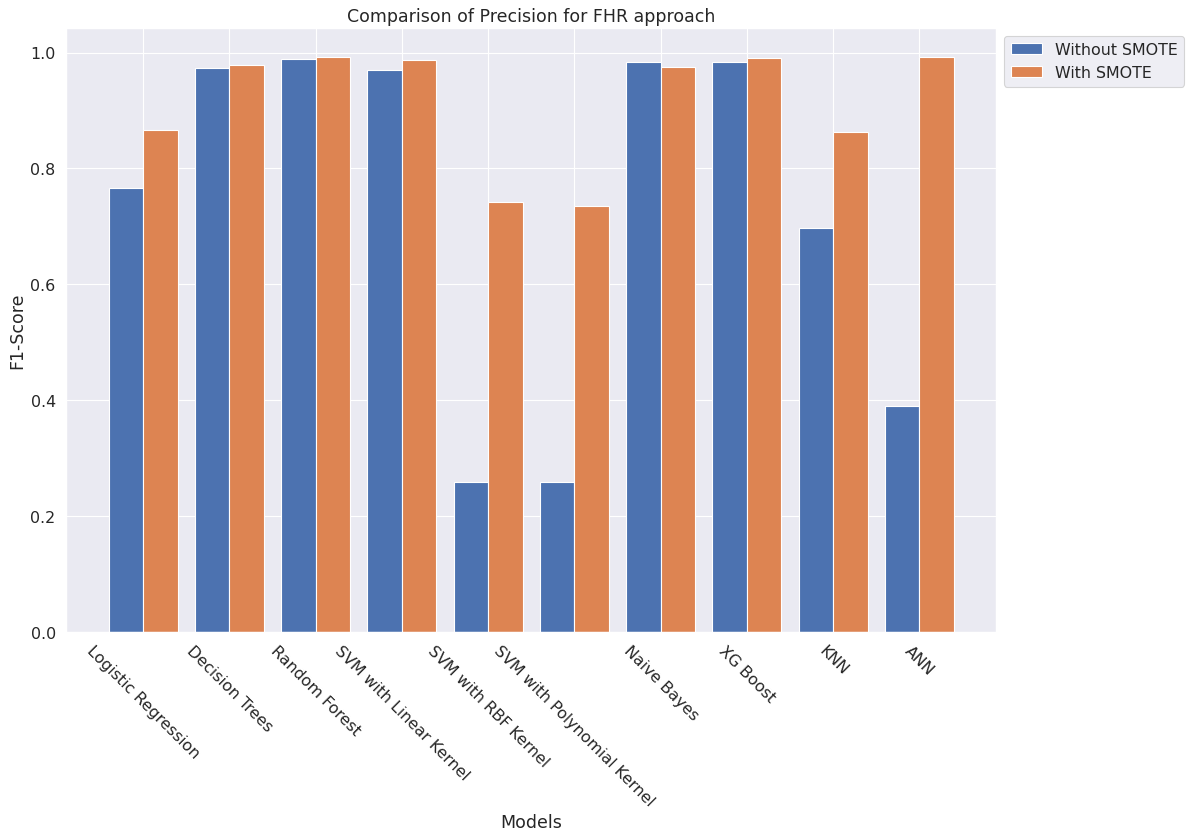

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
# create data
x = np.arange(len(metrics))
y1 = np.array(metrics.loc[:,'Precision'])
y2 = np.array(metrics_SMOTE.loc[:,'Precision'])
width = 0.40
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Comparison of Precision for FHR approach')
plt.legend(["Without SMOTE", "With SMOTE"],bbox_to_anchor=(1, 1), loc='upper left')
# plt.legend()
plt.xticks(x, ['Logistic Regression','Decision Trees','Random Forest','SVM with Linear Kernel','SVM with RBF Kernel','SVM with Polynomial Kernel','Naive Bayes','XG Boost','KNN','ANN'],rotation = -45)

([<matplotlib.axis.XTick at 0x7f03d9bf61f0>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Decision Trees'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'SVM with Linear Kernel'),
  Text(0, 0, 'SVM with RBF Kernel'),
  Text(0, 0, 'SVM with Polynomial Kernel'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'XG Boost'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'ANN')])

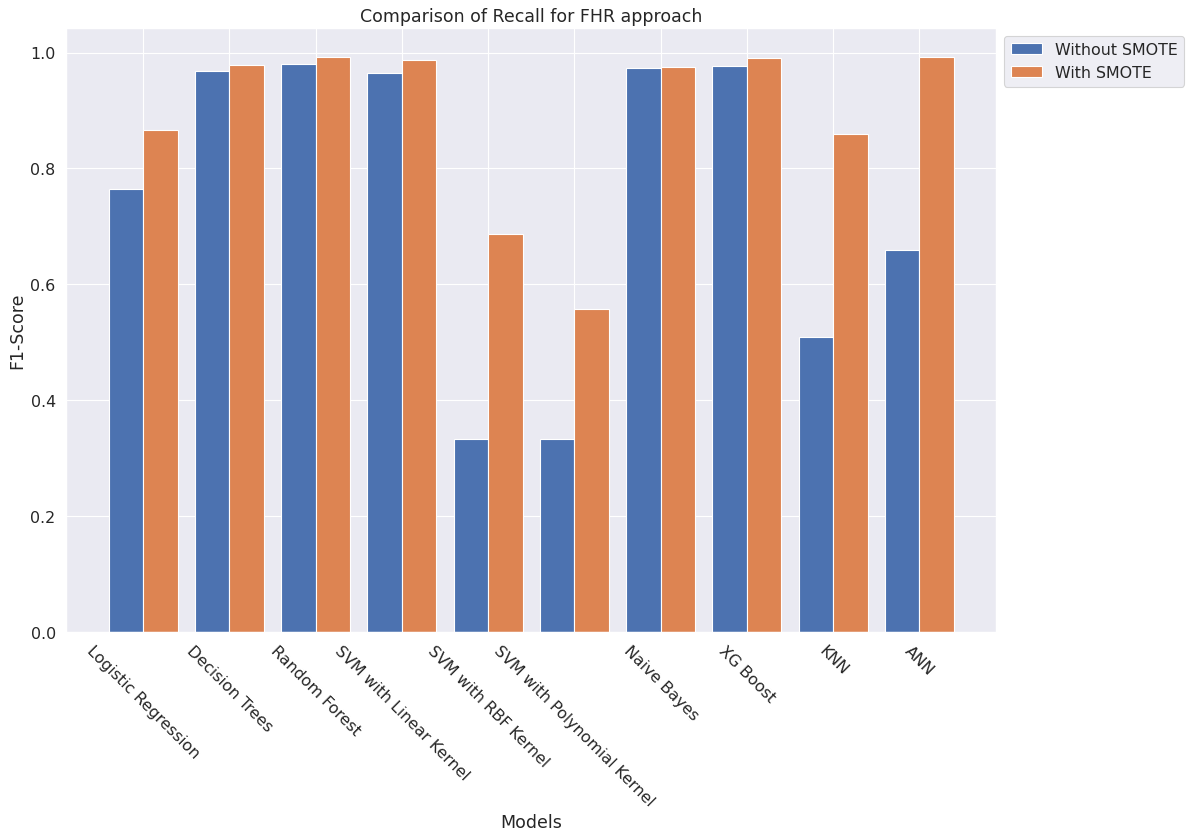

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
# create data
x = np.arange(len(metrics))
y1 = np.array(metrics.loc[:,'Recall'])
y2 = np.array(metrics_SMOTE.loc[:,'Recall'])
width = 0.40
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Comparison of Recall for FHR approach')
plt.legend(["Without SMOTE", "With SMOTE"],bbox_to_anchor=(1, 1), loc='upper left')
# plt.legend()
plt.xticks(x, ['Logistic Regression','Decision Trees','Random Forest','SVM with Linear Kernel','SVM with RBF Kernel','SVM with Polynomial Kernel','Naive Bayes','XG Boost','KNN','ANN'],rotation = -45)